# Carga y Calculos

## Imagenes del 2020

### Carga y Visualizacion

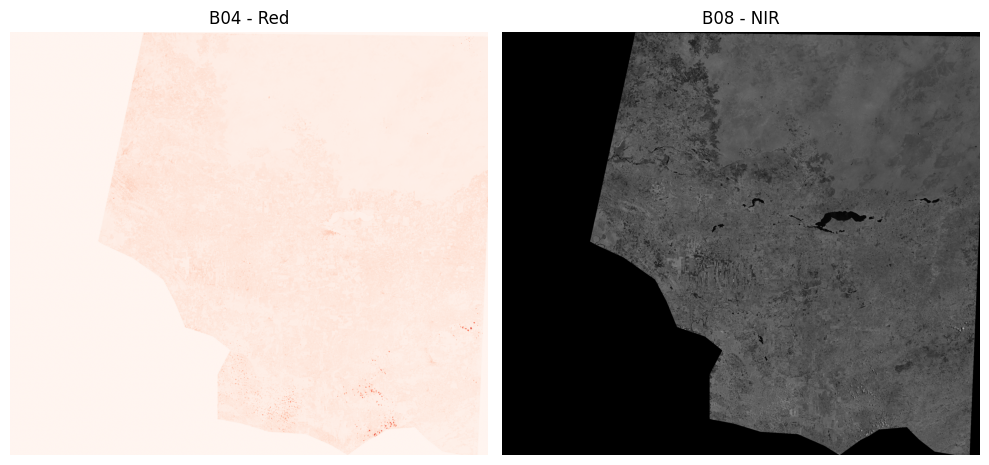

In [17]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

b4_path = Path("data/2020B04.tiff")
b8_path = Path("data/2020B08.tiff")

# Load the bands
with rasterio.open(b4_path) as b4_src:
    b4 = b4_src.read(1)

with rasterio.open(b8_path) as b8_src:
    b8 = b8_src.read(1)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(b4, cmap="Reds")
axes[0].set_title("B04 - Red")
axes[0].axis("off")

axes[1].imshow(b8, cmap="gray")
axes[1].set_title("B08 - NIR")
axes[1].axis("off")

plt.tight_layout()
plt.show()


### NDVI

In [18]:
ndvi2020 = (b8 - b4) / (b8 + b4)
ndvi2020 = np.clip(ndvi2020, -1, 1)

/tmp/ipykernel_2803/2543768970.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi2020 = (b8 - b4) / (b8 + b4)


## Imagenes del 2024

### Carga y Visualizacion

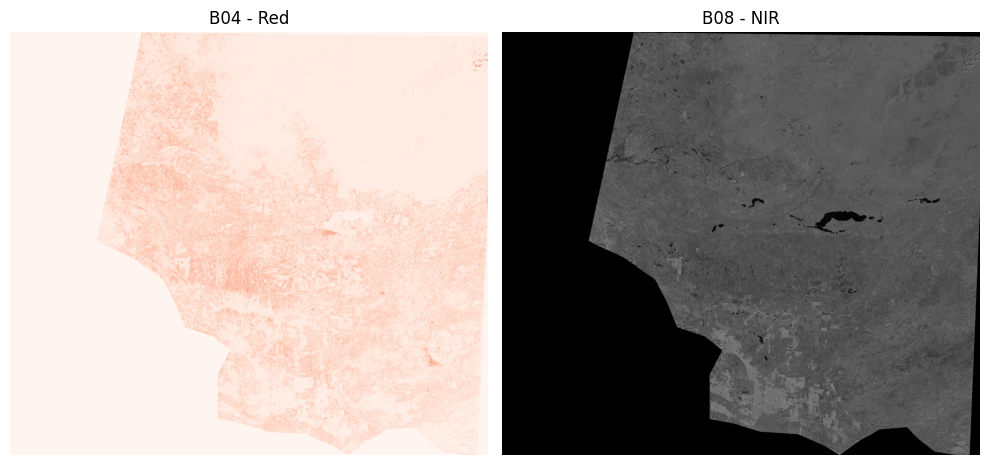

In [19]:
b4_path = Path("data/2024B04.tiff")
b8_path = Path("data/2024B08.tiff")

with rasterio.open(b4_path) as b4_src:
    b4 = b4_src.read(1)

with rasterio.open(b8_path) as b8_src:
    b8 = b8_src.read(1)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(b4, cmap="Reds")
axes[0].set_title("B04 - Red")
axes[0].axis("off")

axes[1].imshow(b8, cmap="gray")
axes[1].set_title("B08 - NIR")
axes[1].axis("off")

plt.tight_layout()
plt.show()


### NDVI

In [20]:
ndvi2024 = (b8 - b4) / (b8 + b4)
ndvi2024 = np.clip(ndvi2024, -1, 1)

/tmp/ipykernel_2803/149181985.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi2024 = (b8 - b4) / (b8 + b4)


## Imagen de Diferencia

In [21]:
ndvi_diff = ndvi2024 - ndvi2020

## Perdida de Vegetacion

In [22]:
loss_mask = ndvi_diff <= -0.2

# Visualizaciones

## NVDI Lado a Lado

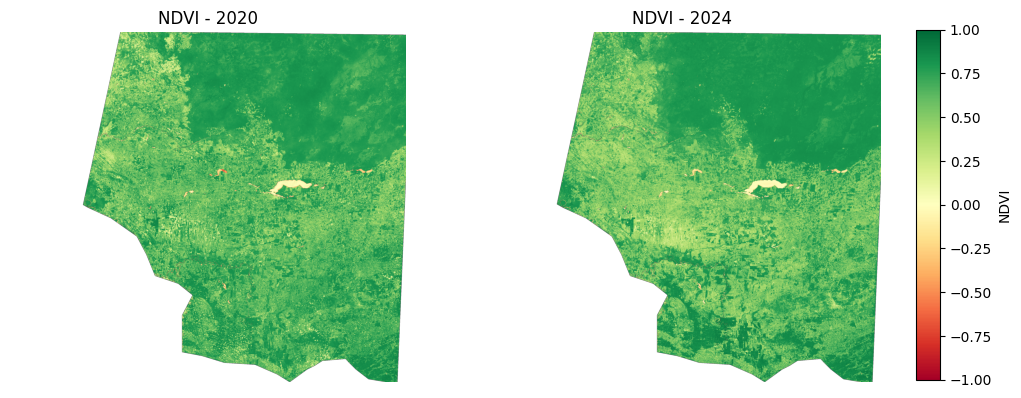

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im1 = axes[0].imshow(ndvi2020, cmap="RdYlGn", vmin=-1, vmax=1)
axes[0].set_title("NDVI - 2020")
axes[0].axis("off")

im2 = axes[1].imshow(ndvi2024, cmap="RdYlGn", vmin=-1, vmax=1)
axes[1].set_title("NDVI - 2024")
axes[1].axis("off")

fig.subplots_adjust(right=0.85)

cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("NDVI")

plt.show()

## NVDI 2024 - 2020

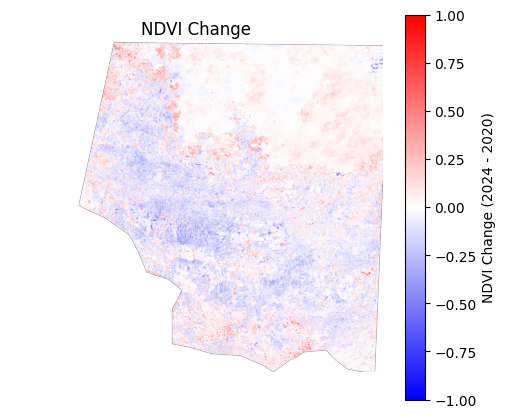

In [ ]:
plt.figure(figsize=(6, 5))
plt.imshow(ndvi_diff, cmap="bwr", vmin=-1, vmax=1)
plt.colorbar(label="NDVI Change (2024 - 2020)")
plt.title("NDVI Change")
plt.axis("off")
plt.show()


## Mascara de Deforestacion

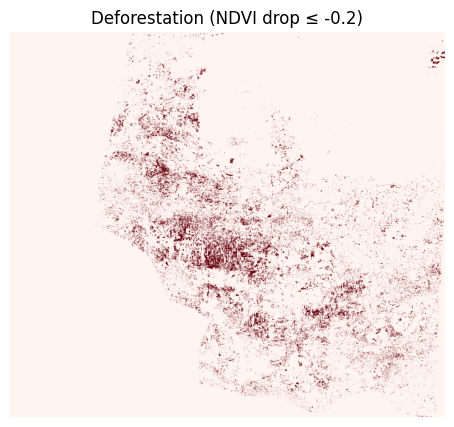

In [ ]:
plt.figure(figsize=(6, 5))
plt.imshow(loss_mask, cmap="Reds")
plt.title("Deforestation (NDVI drop ≤ -0.2)")
plt.axis("off")
plt.show()